In [1]:
#################################################################################################################################
#############################AllState Claims Severity Prediction Challenge - Kaggle - October 2016###############################

# EDA
# Reading in training and test data
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as plt
%pylab inline
df_train = pd.read_csv("C:/Users/HP/Desktop/Kaggle/All State Severity Claims/train.csv")
df_test = pd.read_csv("C:/Users/HP/Desktop/Kaggle/All State Severity Claims/test.csv")
ID = df_test['id'] # Save ID's of test file for submission

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Getting overview of datasets
print("Train data dimensions: ", df_train.shape)
print("Test data dimensions: ", df_test.shape)

Train data dimensions:  (188318, 132)
Test data dimensions:  (125546, 131)


In [379]:
# Join both datasets for feature engineering, just in case its needed somewhere. But before introduce a loss column into test and set it to null

df_test['loss'] = np.nan
df_joined = pd.concat([df_train,df_test])
del df_test['loss']

In [3]:
# Plotting continuous variables. First we collect our continuous variables names into a list
contfeatures = df_train.select_dtypes(include=["float64"])

In [4]:
contfeatures_colnames = list(contfeatures)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

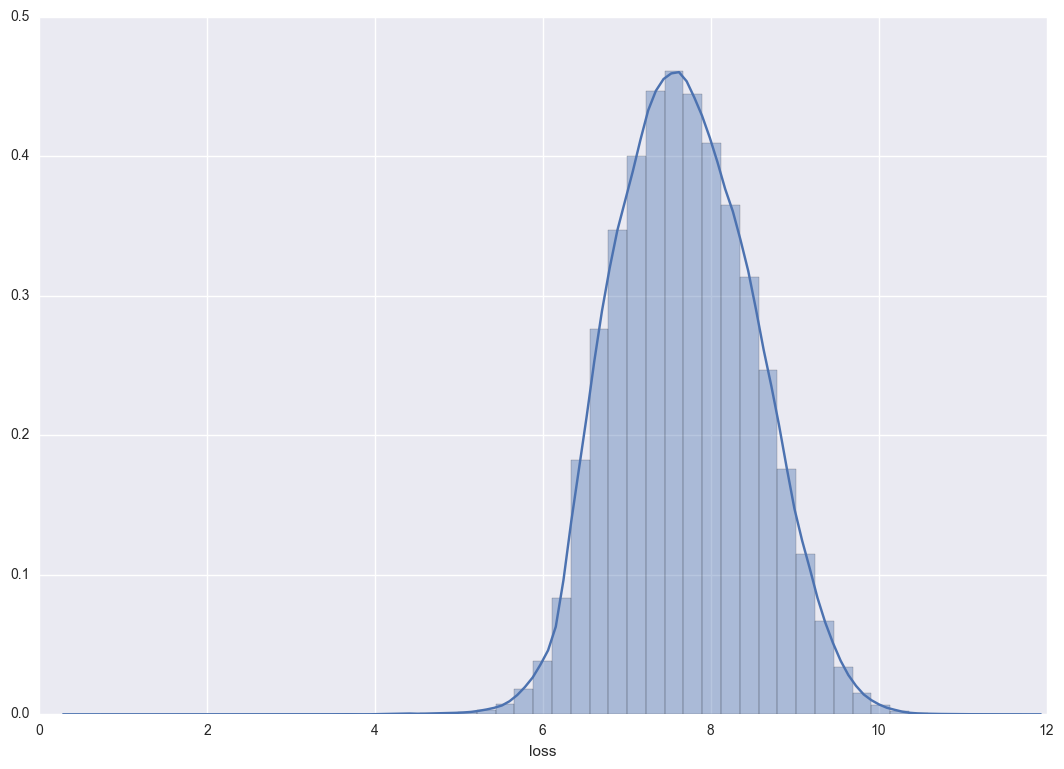

In [383]:
# We saw earlier that the data was heavily right skewed for the 'loss' variable. We look at a distribution plot of the variable
# after taking its log the data looks normal and ready for any analysis like linear models,etc.

plt.figure(figsize=(13,9))
sns.distplot(np.log1p(df_train["loss"]))

In [4]:
# We can drop the id variable as it does not help in modeling
df_train = df_train.iloc[:,1:]
df_train.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
    # Checking skewness of continuous variables

In [14]:
print(df_train.skew())

id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


In [ ]:
# variables loss, cont9, cont7 and to an extent cont8 have skew which can be corrected

In [6]:
size = contfeatures.columns

In [7]:
# Correlation analysis

cols = contfeatures.columns

corr = contfeatures.corr()

threshold = 0.5

cor_list = []

for i in range (0,len(size)):
    for j in range(i+1,len(size)):
        if (corr.iloc[i,j] >= threshold and corr.iloc[i,j] <1) or (corr.iloc[i,j] < 0 and corr.iloc[i,j] <= -threshold):
            cor_list.append([corr.iloc[i,j],i,j])

# Sort to show highest corrleated pairs first

s_cor_list = sorted(cor_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_cor_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))


cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


In [30]:
# cont11, cont1, cont6, cont9, cont7,cont10 can be removed from training and test sets

In [ ]:
# Removing these variables from our datasets

In [5]:
corr_features = ['cont11','cont1','cont6','cont9','cont10']
df_train = df_train.drop(df_train[corr_features],axis=1)

In [6]:
df_test = df_test.drop(df_test[corr_features],axis=1)

In [7]:

df_train['logloss'] = np.log1p(df_train['loss'])


In [8]:
df_train.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont3,cont4,cont5,cont7,cont8,cont12,cont13,cont14,loss,logloss
0,A,B,A,B,A,A,A,A,B,A,...,0.187583,0.789639,0.310061,0.335060,0.30260,0.594646,0.822493,0.714843,2213.18,7.702637
1,A,B,A,A,A,A,A,A,B,B,...,0.592681,0.614134,0.885834,0.436585,0.60087,0.366307,0.611431,0.304496,1283.60,7.158203
2,A,B,A,A,B,A,A,A,B,B,...,0.484196,0.236924,0.397069,0.315545,0.27320,0.373424,0.195709,0.774425,3005.09,8.008396
3,B,B,A,B,A,A,A,A,B,A,...,0.527991,0.373816,0.422268,0.391128,0.31796,0.321570,0.605077,0.602642,939.85,6.846784
4,A,B,A,B,A,A,A,A,B,B,...,0.527991,0.473202,0.704268,0.247408,0.24564,0.202213,0.246011,0.432606,2763.85,7.924742


In [9]:
catfeatures = df_train.select_dtypes(include=["object"])


In [10]:
catfeatures_list = list(catfeatures)

In [14]:
# In training set check for varbs with >10 levels

catvarbs_10 = list((df_train[catfeatures_list].apply(pd.Series.nunique)>10))


In [15]:
catvarlist = []
for (i, v) in zip(catfeatures_list, catvarbs_10):
    if(v):
        catvarlist.append(i)

In [16]:
print(catvarlist)
len(catvarlist)

['cat99', 'cat100', 'cat101', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116']


17

In [8]:

# There are 17 such categorical variables we must work upon

In [17]:
# Encoding all categorical variables with >10 levels using supervised ratio- something similar to Owen Zhang's Leave one out 
#Encoding technique

# Getting all those categorical variables into a new dataset
# WE append 'loss' variable to the cat varb dataset to compute means and variance

catvarlist.append('logloss')
df_cat_encod = df_train[catvarlist]
df_cat_encod.head(5)



,cat99,cat100,cat101,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,logloss
0,T,B,G,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,7.702637
1,T,L,F,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,7.158203
2,D,L,O,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,8.008396
3,T,I,D,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,6.846784
4,P,F,J,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,7.924742


In [19]:
# Computing mean & variance values of target for each category by each level

#before running our function to encode, we need to ensure that the list of char variables which we pass to the function
#does not the 'loss' variable in it

catvarlist.remove('logloss')
catvarlist
target=['logloss']
"new"+catvarlist[0]


'newcat99'

In [20]:
# Putting everything into a function

#But Before that, we define a function which will flatten a multi index column names which are created after aggregation of data
def flattenHierarchicalCol(col,sep = ','):
    if not type(col) is tuple:
        return col
    else:
        new_col = ''
        for leveli,level in enumerate(col):
            if not level == '':
                if not leveli == 0:
                    new_col += sep
                new_col += level
        return new_col

In [21]:
def cat_encoding(list, dataframe, target):
    for i in range(len(list)):
        group_df = dataframe.groupby([list[i]], as_index=False).agg({target:{"mean"+list[i]:'mean', 
                                                                    "stdev"+list[i]:'std'}})
        dataframe = pd.merge(dataframe, group_df, on=list[i], how='left')
    
    dataframe.columns = dataframe.columns.map(flattenHierarchicalCol)
    return dataframe

In [22]:
new = cat_encoding(catvarlist,df_cat_encod,target[0])

In [23]:
# Some stdev values should be zero as a particular level may appear only once. Those values show up as NaN in our data
# and have to be replaced

new.fillna(0, inplace=True)

In [411]:

# there are no missing values or NaN now

In [24]:
new.head(5)

,cat99,cat100,cat101,cat103,cat104,cat105,cat106,cat107,cat108,cat109,...,"logloss,meancat112","logloss,stdevcat112","logloss,meancat113","logloss,stdevcat113","logloss,stdevcat114","logloss,meancat114","logloss,meancat115","logloss,stdevcat115","logloss,meancat116","logloss,stdevcat116"
0,T,B,G,A,I,E,G,J,G,BU,...,7.824107,0.788870,7.623499,0.758090,0.793651,7.774948,7.667584,0.797272,7.675181,0.779026
1,T,L,F,A,E,E,I,K,K,BI,...,7.416764,0.844268,7.634536,0.815351,0.793651,7.774948,7.667584,0.797272,7.688910,0.846272
2,D,L,O,B,E,F,H,F,A,AB,...,7.747183,0.812036,7.676491,0.802501,0.793651,7.774948,7.652835,0.814291,7.628363,0.744062
3,T,I,D,A,E,E,I,K,K,BI,...,7.702934,0.785849,7.649874,0.810725,0.793651,7.774948,7.667584,0.797272,7.649112,0.814152
4,P,F,J,A,D,E,K,G,B,H,...,7.654967,0.773446,7.634536,0.815351,0.793651,7.774948,7.677612,0.821570,7.711219,0.805475


In [413]:
del new['logloss']

In [414]:
names = new.columns
names


Index(['cat99', 'cat100', 'cat101', 'cat103', 'cat104', 'cat105', 'cat106',
       'cat107', 'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 'cat113',
       'cat114', 'cat115', 'cat116', 'logloss,stdevcat99', 'logloss,meancat99',
       'logloss,stdevcat100', 'logloss,meancat100', 'logloss,stdevcat101',
       'logloss,meancat101', 'logloss,stdevcat103', 'logloss,meancat103',
       'logloss,meancat104', 'logloss,stdevcat104', 'logloss,stdevcat105',
       'logloss,meancat105', 'logloss,stdevcat106', 'logloss,meancat106',
       'logloss,stdevcat107', 'logloss,meancat107', 'logloss,meancat108',
       'logloss,stdevcat108', 'logloss,meancat109', 'logloss,stdevcat109',
       'logloss,meancat110', 'logloss,stdevcat110', 'logloss,meancat111',
       'logloss,stdevcat111', 'logloss,stdevcat112', 'logloss,meancat112',
       'logloss,stdevcat113', 'logloss,meancat113', 'logloss,meancat114',
       'logloss,stdevcat114', 'logloss,meancat115', 'logloss,stdevcat115',
       'logloss,stdevc

In [ ]:
    # Removing the word 'loss' from the left of the newly created columns
new.rename(columns = lambda x: x.replace('logloss,',''), inplace=True)

In [420]:
cat_encod_test = df_test[catvarlist]
cat_encod_test.head(5)

,cat99,cat100,cat101,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,T,H,G,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG
1,P,B,D,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK
2,D,G,Q,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK
3,T,G,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ
4,P,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA


In [421]:
new2 = new


In [422]:
new2 = new2.drop(new2[catvarlist],axis=1)


In [423]:
new2_onlystdev = new2.filter(like='stdev', axis=1)

In [424]:
stdev_names  = new2_onlystdev.columns

In [425]:
new2_onlymean = new2.filter(like='mean', axis=1)

In [426]:
mean_names = new2_onlymean.columns
mean_names

Index(['meancat99', 'meancat100', 'meancat101', 'meancat103', 'meancat104',
       'meancat105', 'meancat106', 'meancat107', 'meancat108', 'meancat109',
       'meancat110', 'meancat111', 'meancat112', 'meancat113', 'meancat114',
       'meancat115', 'meancat116'],
      dtype='object')

In [427]:
stdev_names.sort
mean_names.sort

<bound method Index.sort of Index(['meancat99', 'meancat100', 'meancat101', 'meancat103', 'meancat104',
       'meancat105', 'meancat106', 'meancat107', 'meancat108', 'meancat109',
       'meancat110', 'meancat111', 'meancat112', 'meancat113', 'meancat114',
       'meancat115', 'meancat116'],
      dtype='object')>

In [428]:
# Getting a dictionary based on training set encoding
for i in range(len(catvarlist)):
    mydict = dict(zip(new[catvarlist[i]], new[mean_names[i]]))
    cat_encod_test[mean_names[i]] = cat_encod_test[catvarlist[i]].map(mydict)
    mydict2 = dict(zip(new[catvarlist[i]], new[stdev_names[i]]))
    cat_encod_test[stdev_names[i]] = cat_encod_test[catvarlist[i]].map(mydict2)


In [429]:

cat_encod_test2 = cat_encod_test
cat_encod_test2 = cat_encod_test2.drop(cat_encod_test2[catvarlist],axis=1)

In [433]:
# Appending the above to the original test set and dropping the original variables from test set

df_test_encoded = df_test
df_test_encoded.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat116,cont2,cont3,cont4,cont5,cont7,cont8,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,HG,0.299102,0.246911,0.402922,0.281143,0.317681,0.61229,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,HK,0.620805,0.654310,0.946616,0.836443,0.443760,0.71330,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,CK,0.737068,0.711159,0.412789,0.718531,0.325779,0.29758,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,DJ,0.681761,0.592681,0.354893,0.397069,0.342355,0.40028,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,HA,0.299102,0.263570,0.696873,0.302678,0.391833,0.23688,0.352251,0.301535,0.825823


In [434]:
del df_test_encoded['id']


In [435]:
df_test_encoded = df_test_encoded.drop(df_test_encoded[catvarlist], axis=1)

In [436]:
df_test_encoded2 = pd.concat([df_test_encoded, cat_encod_test2], axis=1)
df_test_encoded2.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,meancat112,stdevcat112,meancat113,stdevcat113,meancat114,stdevcat114,meancat115,stdevcat115,meancat116,stdevcat116
0,A,B,A,A,A,A,A,A,B,A,...,7.584808,0.834366,7.707454,0.818339,7.774948,0.793651,7.720294,0.793610,7.599985,0.783922
1,A,B,A,B,A,A,A,A,B,A,...,7.794440,0.764510,7.675880,0.815698,7.774948,0.793651,7.717597,0.792957,7.690697,0.838854
2,A,B,A,B,B,A,B,A,B,B,...,7.502006,0.842471,7.649874,0.810725,7.774948,0.793651,7.677612,0.821570,7.711219,0.805475
3,A,A,A,A,B,A,A,A,A,A,...,7.655151,0.740239,7.663709,0.803780,7.774948,0.793651,7.689795,0.796498,7.649112,0.814152
4,B,A,A,A,A,B,A,A,A,A,...,7.728269,0.819402,7.507995,0.763237,7.290746,0.784498,7.693859,0.832827,7.417526,0.617150


In [437]:
# remove duplicated columns
remove = []
cols = df_test_encoded2.columns
for i in range(len(cols)-1):
    v = df_test_encoded2[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,df_test_encoded2[cols[j]].values):
            remove.append(cols[j])

In [441]:
#df_test_encoded2.head(5)
df_test_encoded2.fillna(0,inplace=True)


In [12]:
# Doing the same with train set
df_train_encoded = df_train

In [363]:
#df_train_encoded = df_train_encoded.reset_index()

In [13]:
df_train_encoded.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont3,cont4,cont5,cont7,cont8,cont12,cont13,cont14,loss,logloss
0,A,B,A,B,A,A,A,A,B,A,...,0.187583,0.789639,0.310061,0.335060,0.30260,0.594646,0.822493,0.714843,2213.18,7.702637
1,A,B,A,A,A,A,A,A,B,B,...,0.592681,0.614134,0.885834,0.436585,0.60087,0.366307,0.611431,0.304496,1283.60,7.158203
2,A,B,A,A,B,A,A,A,B,B,...,0.484196,0.236924,0.397069,0.315545,0.27320,0.373424,0.195709,0.774425,3005.09,8.008396
3,B,B,A,B,A,A,A,A,B,A,...,0.527991,0.373816,0.422268,0.391128,0.31796,0.321570,0.605077,0.602642,939.85,6.846784
4,A,B,A,B,A,A,A,A,B,B,...,0.527991,0.473202,0.704268,0.247408,0.24564,0.202213,0.246011,0.432606,2763.85,7.924742


In [446]:
#df_train_encoded = df_train_encoded.drop(df_train_encoded[catvarlist], axis=1)

In [447]:
#new = new.drop(new[catvarlist],axis=1)

In [448]:
#df_train_encoded2 = pd.concat([df_train_encoded, new], axis=1)
#df_train_encoded2.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,stdevcat112,meancat112,stdevcat113,meancat113,meancat114,stdevcat114,meancat115,stdevcat115,stdevcat116,meancat116
0,A,B,A,B,A,A,A,A,B,A,...,0.788870,7.824107,0.758090,7.623499,7.774948,0.793651,7.667584,0.797272,0.779026,7.675181
1,A,B,A,A,A,A,A,A,B,B,...,0.844268,7.416764,0.815351,7.634536,7.774948,0.793651,7.667584,0.797272,0.846272,7.688910
2,A,B,A,A,B,A,A,A,B,B,...,0.812036,7.747183,0.802501,7.676491,7.774948,0.793651,7.652835,0.814291,0.744062,7.628363
3,B,B,A,B,A,A,A,A,B,A,...,0.785849,7.702934,0.810725,7.649874,7.774948,0.793651,7.667584,0.797272,0.814152,7.649112
4,A,B,A,B,A,A,A,A,B,B,...,0.773446,7.654967,0.815351,7.634536,7.774948,0.793651,7.677612,0.821570,0.805475,7.711219


In [14]:
cat = df_train_encoded.select_dtypes(include=["object"])
vars=[]
vars = cat.columns

In [17]:
del df_train_encoded['loss']
del df_test['id']


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont2,cont3,cont4,cont5,cont7,cont8,cont12,cont13,cont14,logloss
0,A,B,A,B,A,A,A,A,B,A,...,0.245921,0.187583,0.789639,0.310061,0.335060,0.30260,0.594646,0.822493,0.714843,7.702637
1,A,B,A,A,A,A,A,A,B,B,...,0.737068,0.592681,0.614134,0.885834,0.436585,0.60087,0.366307,0.611431,0.304496,7.158203
2,A,B,A,A,B,A,A,A,B,B,...,0.358319,0.484196,0.236924,0.397069,0.315545,0.27320,0.373424,0.195709,0.774425,8.008396
3,B,B,A,B,A,A,A,A,B,A,...,0.555782,0.527991,0.373816,0.422268,0.391128,0.31796,0.321570,0.605077,0.602642,6.846784
4,A,B,A,B,A,A,A,A,B,B,...,0.159990,0.527991,0.473202,0.704268,0.247408,0.24564,0.202213,0.246011,0.432606,7.924742


In [18]:
# Now we have both our train and test sets with categorical variables >10 levels encoded. Before modeling, we need to encode all
# variables into numeric to use scikit learn
from sklearn.preprocessing import LabelEncoder

for cf in vars:
    le = LabelEncoder()
    le.fit(df_train_encoded[cf].unique())
    df_train_encoded[cf] = le.transform(df_train_encoded[cf])


In [19]:
# Doing the same for test too

for cf in vars:
    le = LabelEncoder()
    le.fit(df_test[cf].unique())
    df_test[cf] = le.transform(df_test[cf])

In [44]:
df_test.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat116,cont2,cont3,cont4,cont5,cont7,cont8,cont12,cont13,cont14
0,0,1,0,0,0,0,0,0,1,0,...,169,0.299102,0.246911,0.402922,0.281143,0.317681,0.61229,0.369858,0.704052,0.392562
1,0,1,0,1,0,0,0,0,1,0,...,173,0.620805,0.654310,0.946616,0.836443,0.443760,0.71330,0.675759,0.453468,0.208045
2,0,1,0,1,1,0,1,0,1,1,...,51,0.737068,0.711159,0.412789,0.718531,0.325779,0.29758,0.241676,0.258586,0.297232
3,0,0,0,0,1,0,0,0,0,0,...,76,0.681761,0.592681,0.354893,0.397069,0.342355,0.40028,0.341872,0.592264,0.555955
4,1,0,0,0,0,1,0,0,0,0,...,163,0.299102,0.263570,0.696873,0.302678,0.391833,0.23688,0.352251,0.301535,0.825823


In [476]:
# Taking indep and dep variable into separate lists

#df_train_encoded2['loss'] = df_train['loss']


In [478]:
#del df_train_encoded2['logloss']

In [21]:
indep_vars = list(df_train_encoded)
indep_vars.remove('logloss')

In [ ]:
# Variable selection using RFE

In [27]:
from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        tmin, tsec = divmod((datetime.now() - start_time).total_seconds(), 60)
        print(' Time taken: %i minutes and %s seconds.' % (tmin, round(tsec, 2)))


y = np.array(df_train_encoded['logloss'])



In [28]:
trainc = df_train_encoded.drop(['logloss'], axis=1)
testc = df_test
ntrain = trainc.shape[0]
ntest = testc.shape[0]
train_test = pd.concat((trainc, testc)).reset_index(drop=True)

In [29]:
X = np.array(trainc)
Xt = np.array(testc)

In [30]:
rfr = RandomForestRegressor(n_estimators=20, max_depth=5, n_jobs=1)
rfecv = RFECV(estimator=rfr,
              step=20,
              cv=KFold(y.shape[0],
                       n_folds=5,
                       shuffle=False,
                       random_state=101),
              scoring='mean_absolute_error',
              verbose=2)


# Estimate feature importance and time the whole process
start_time = timer(None)
rfecv.fit(X, y)
timer(start_time)


Fitting estimator with 125 features.
Fitting estimator with 105 features.
Fitting estimator with 85 features.
Fitting estimator with 65 features.
Fitting estimator with 45 features.
Fitting estimator with 25 features.
Fitting estimator with 5 features.
Fitting estimator with 125 features.
Fitting estimator with 105 features.
Fitting estimator with 85 features.
Fitting estimator with 65 features.
Fitting estimator with 45 features.
Fitting estimator with 25 features.
Fitting estimator with 5 features.
Fitting estimator with 125 features.
Fitting estimator with 105 features.
Fitting estimator with 85 features.
Fitting estimator with 65 features.
Fitting estimator with 45 features.
Fitting estimator with 25 features.
Fitting estimator with 5 features.
Fitting estimator with 125 features.
Fitting estimator with 105 features.
Fitting estimator with 85 features.
Fitting estimator with 65 features.
Fitting estimator with 45 features.
Fitting estimator with 25 features.
Fitting estimator with 

In [31]:
all_features = [x for x in trainc.columns]

# Summarize the output
print(' Optimal number of features: %d' % rfecv.n_features_)
sel_features = [f for f, s in zip(all_features, rfecv.support_) if s]
print(' The selected features are {}'.format(sel_features))


 Optimal number of features: 25
 The selected features are ['cat1', 'cat2', 'cat6', 'cat7', 'cat11', 'cat12', 'cat24', 'cat44', 'cat53', 'cat57', 'cat72', 'cat77', 'cat79', 'cat80', 'cat81', 'cat94', 'cat100', 'cat101', 'cat103', 'cat111', 'cat114', 'cont2', 'cont7', 'cont12', 'cont14']


In [75]:
# But random forest regressor with RFE should be run at least with n_estimators=200 and step =4 or lesser. Due to computing 
# constraints it hasn't been done here. Based on other users who ran RFE with those parameters the following variables were
#selected
sel_features2 = []
sel_features2 =  ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 
                  'cat11', 'cat12', 'cat13', 'cat14', 'cat16', 'cat17', 'cat23', 'cat24', 'cat25', 
                  'cat26', 'cat27', 'cat28', 'cat29', 'cat31', 'cat32', 'cat36', 'cat37', 'cat38', 
                  'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 
                  'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat57', 'cat58', 'cat59', 
                  'cat61', 'cat65', 'cat66', 'cat67', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 
                  'cat76', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 
                  'cat86', 'cat87', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 
                  'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 
                  'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 
                  'cat113', 'cat114', 'cat115', 'cat116','cont2', 'cont3', 'cont4', 'cont5', 
                  'cont7', 'cont8', 'cont12', 'cont13', 'cont14']

In [76]:
# Building a basic linear model and testing based on these variables
# Building our first model using these variables
# Defining a function to fit model and perform cross validation

from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression

def fit_model(model, data, predictors, outcome):
  
    #Fit the model:
    model.fit(data[predictors],data[outcome])
       
    
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
        print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    


In [73]:
target = ['logloss']

In [77]:
# Running model
model = LinearRegression()

fit_model(model, df_train_encoded, sel_features2, target[0])

# errors are still high

Cross-Validation Score : 48.569%
Cross-Validation Score : 48.624%
Cross-Validation Score : 48.524%
Cross-Validation Score : 48.464%
Cross-Validation Score : 48.462%


In [78]:
df_test2 = df_test[sel_features2]

In [79]:
# Our mean errors are very high!

# Predictions
df_test2['predictions'] = np.exp(model.predict(df_test2))

#del df_test2['predictions']

In [81]:



# Writing to csv file

In [82]:
import os  
os.chdir('C:\\Users\\HP\\Desktop\\Kaggle\\All State Severity Claims')
os.getcwd()   


'C:\\Users\\HP\\Desktop\\Kaggle\\All State Severity Claims'

In [83]:
# Writing predictions to csv for submission
df_test2.to_csv("predictions.csv")

In [70]:
# But RFE is not a very stable method for feature selection

In [268]:
X = df_train_encoded2[indep_vars]
Y  = df_train_encoded2[target]
names = df_train_encoded2[indep_vars].columns

In [269]:
# Using Randomized lasso for feature selection
from sklearn.linear_model import RandomizedLasso
rlasso = RandomizedLasso(alpha=0.025, n_resampling=50,max_iter =10,n_jobs =1)
rlasso.fit(X, Y)

print("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. P

Features sorted by their score:
[(0.85999999999999999, 'cat80'), (0.80000000000000004, 'cat79'), (0.59999999999999998, 'cat57'), (0.57999999999999996, 'cat81'), (0.56000000000000005, 'meancat100'), (0.54000000000000004, 'meancat101'), (0.52000000000000002, 'cat87'), (0.47999999999999998, 'meancat116'), (0.44, 'meancat103'), (0.41999999999999998, 'stdevcat113'), (0.40000000000000002, 'cont2'), (0.40000000000000002, 'cat12'), (0.38, 'stdevcat100'), (0.32000000000000001, 'stdevcat116'), (0.32000000000000001, 'meancat113'), (0.32000000000000001, 'cat72'), (0.26000000000000001, 'cat1'), (0.23999999999999999, 'meancat111'), (0.22, 'stdevcat101'), (0.20000000000000001, 'cat7'), (0.17999999999999999, 'cat89'), (0.14000000000000001, 'meancat105'), (0.14000000000000001, 'cat11'), (0.14000000000000001, 'cat10'), (0.10000000000000001, 'stdevcat103'), (0.10000000000000001, 'meancat114'), (0.080000000000000002, 'cat2'), (0.080000000000000002, 'cat13'), (0.059999999999999998, 'cont7'), (0.04000000000

In [270]:
from sklearn.preprocessing import MinMaxScaler
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks))
 

In [271]:
final_feats = {}
final_feats = rank_to_dict(np.abs(rlasso.scores_), names)

In [273]:
from collections import OrderedDict
from operator import itemgetter

final_feats = OrderedDict(sorted(final_feats.items(), key=itemgetter(1), reverse=True))

In [274]:
final_feats = {k:v for (k,v) in final_feats.items() if v > 0.01}

In [151]:
# Using all variables with co-eff > 0.10 (in this case only three will be left out) and running our first model


In [280]:
indep_vars_final=[]
indep_vars_final = list(final_feats.keys())

In [470]:

# We have 34 variables selected from our lasso feature selection

In [288]:
# Writing predictions to csv for submission
X_test_lasso.to_csv("predictions_lasso.csv")